# 3. Data analysis and optimization

Now that we have the data, we need to examine it and refine the information before we can move on.  
To do this, we will first import the required directories:

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from datetime import date, datetime, timedelta
from sklearn.feature_extraction.text import CountVectorizer

Now lets load our data:  
(For convenience - the database has been translated into English using Google Translate)

In [2]:
df = pd.read_csv('data/data_after_scraping_translated.csv')

> # 3.1 Variable classification:

To begin the analysis of the information we received we will need to classify the variables.  
Let's print all the variables in our table:

In [3]:
print(df.columns.values)

['docTitle' 'docName' 'gender' 'firstSpeciality' 'secountSpeciality'
 'numberOfSpecializations' 'clinicStreet' 'clinicCity'
 'closestAppointment' 'dateOfScraping' 'onlineAppointmentScheduling'
 'onlineAppointmentCanceling' 'needsReferral' 'preformUS' 'absence'
 'acceptingNewPatients' 'videoCall' 'licenseNum' 'languages' 'visitCost'
 'accessible' 'receptionOnSunday' 'receptionOnMonday' 'receptionOnTuesday'
 'receptionOnWednesday' 'receptionOnThursday' 'receptionOnFriday'
 'receptionOnSaturday' 'graduationYear' 'academicInstitution' 'profession'
 'specialization' 'specializationMedicalInstitution' 'specializationYear']


Let's understand what each variable contains:

**docTitle** - Represents the doctor's degree (Dr/Prof).  
**docName** - Represents the doctor's name.  
**gender** - Represents the doctor's gender (M/F).  
**firstSpeciality** - Represents the doctor's main speciality.  
**secountSpeciality** - Represents the doctor's secoundary spaciality (if there is one).  
**numberOfSpecializations** - Represents the doctor's number of specializations.  
**clinicStreet** - Represents the clinic street.  
**clinicCity** - Represents the clinic city.  
**closestAppointment** - Represents the closest appoitment available.  
**dateOfScraping** - Represents the date of accuracy of information.  
**onlineAppointmentScheduling** - Represents the ability to schedule an appointment online (True/False).  
**onlineAppointmentCanceling**  - Represents the ability to cancel an appointment online (True/False).  
**needsReferral** - Represents the need of referral in order to schedule an appointment (True/False).  
**preformUS** - Represents the ability of the doctor to perform an ultrasound during the session (True/False).  
**absence** - Represents the fact that the doctor is absent from work (True/False).  
**acceptingNewPatients** - Represents the fact that the doctor is accepting new patients (True/False).  
**videoCall** - Represents the ability to schedule a video-chat appointment (True/False).  
**licenseNum** - Represents the doctor license number.  
**languages** - Represents the languages in which the doctor provides a medical service.  
**visitCost** - Represents the cost of the visit (in ILS).  
**accessible** - Represents the fact that the clinic is accessible to people with disabilities (True/False).  
**receptionOnSunday** - Represents the reception time on sunday (DateTime).  
**receptionOnMonday** - Represents the reception time on monday (DateTime).  
**receptionOnTuesday** - Represents the reception time on tuesday (DateTime).  
**receptionOnWednesday** - Represents the reception time on wednesday (DateTime).  
**receptionOnThursday** - Represents the reception time on thursday (DateTime).  
**receptionOnFriday** - Represents the reception time on friday (DateTime).  
**receptionOnSaturday** - Represents the reception time on saturday (DateTime).  
**graduationYear** - Represents the doctor graduation year from academic studies (yyyy).  
**academicInstitution** - Represents the doctor academic institution.  
**profession** - Represents the doctor profession.  
**specialization** - Represents the doctor specialization.  
**specializationMedicalInstitution** - Represents the doctor specialization medical institution.  
**specializationYear** - Represents the doctor graduation year from the specialization (yyyy).

Great, Let's classify our variables:

| **Discrete Numerical**  | **Continuous Numerical** | **Ordinal Categorical** | **Nominal Categorical**         | **DateTime**         | **Other**    |
|:-----------------------:|:-------------------------:|:-----------------------:|:--------------------------------:|:--------------------:|:------------:|
| numberOfSpecializations | visitCost                 | docTitle                | gender                           | closestAppointment   | docName      |
|                         | graduationYear            |                         | firstSpeciality                  | dateOfScraping       | clinicStreet |
|                         | specializationYear        |                         | secountSpeciality                | receptionOnSunday    | licenseNum   |
|                         |                           |                         | clinicCity                       | receptionOnMonday    |              |
|                         |                           |                         | onlineAppointmentScheduling      | receptionOnTuesday   |              |
|                         |                           |                         | onlineAppointmentCanceling       | receptionOnWednesday |              |
|                         |                           |                         | needsReferral                    | receptionOnThursday  |              |
|                         |                           |                         | preformUS                        | receptionOnFriday    |              |
|                         |                           |                         | absence                          | receptionOnSaturday  |              |
|                         |                           |                         | acceptingNewPatients             |                      |              |
|                         |                           |                         | videoCall                        |                      |              |
|                         |                           |                         | languages                        |                      |              |
|                         |                           |                         | accessible                       |                      |              |
|                         |                           |                         | academicInstitution              |                      |              |
|                         |                           |                         | profession                       |                      |              |
|                         |                           |                         | specialization                   |                      |              |
|                         |                           |                         | specializationMedicalInstitution |                      |              |


> # 3.2 Data Correction

Once we have categorized our variables, we will move on to correcting the information we have collected.  
This step is necessary as it is possible that during our collection  
information was collected incorrectly or in a way that could not be worked with.  
To do this we will use the df.info command and check what needs to be fixed.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   docTitle                          10061 non-null  object 
 1   docName                           10061 non-null  object 
 2   gender                            10061 non-null  object 
 3   firstSpeciality                   10061 non-null  object 
 4   secountSpeciality                 1069 non-null   object 
 5   numberOfSpecializations           10061 non-null  int64  
 6   clinicStreet                      9907 non-null   object 
 7   clinicCity                        10061 non-null  object 
 8   closestAppointment                7156 non-null   object 
 9   dateOfScraping                    10061 non-null  object 
 10  onlineAppointmentScheduling       10061 non-null  int64  
 11  onlineAppointmentCanceling        10061 non-null  int64  
 12  need

Let's start by removing duplicate entris.

In [5]:
print("We have", df[df.duplicated()].shape[0], "duplicated rows")
print("This is a very large amount, but to get credible results we had to get rid of them")
df.drop_duplicates(inplace=True, keep='first')
print("--- Duplicates entris removed ---")
print ("Total duplicates:", df[df.duplicated()].shape[0],"out of", df.shape[0], "rows")

We have 2083 duplicated rows
This is a very large amount, but to get credible results we had to get rid of them
--- Duplicates entris removed ---
Total duplicates: 0 out of 7978 rows


Now, lets deal with **closestAppointment**.
  
Since we want to predict Waiting times for appointments we need to dump all the null values.

In [6]:
df.dropna(subset=["closestAppointment"], inplace=True)

The value foramt is: [dd/mm/yy dayInWeek].  
Let's separate them into two columns.

In [7]:
# create another column for the dayInWeek
dayInWeek = df["closestAppointment"]
df.insert(9, 'closestAppointmentDayInWeek', dayInWeek)

# set the weekday inside closestAppointmentDayInWeek
df["closestAppointmentDayInWeek"] = df['closestAppointment'].apply(lambda x: re.search(r"(\w+)\s([0-9]+\/[0-9]+\/[0-9]+)", str(x)).group(1))


# use the regex in order to get a clean date
df['closestAppointment'] = df['closestAppointment'].apply(lambda x: re.search(r"(\w+)\s([0-9]+\/[0-9]+\/[0-9]+)", str(x)).group(2))

We would also like to know the number of days to the appointment.

In [8]:
# convert to datetime
df = df.astype({"closestAppointment": "datetime64", "dateOfScraping": "datetime64"})

# create another column for the daysToAppointment
daysToAppointment = df["closestAppointment"]
df.insert(9, 'daysToAppointment', daysToAppointment)

# calculate the number of days to the appoitment
df["daysToAppointment"] = df["closestAppointment"] - df["dateOfScraping"]
df["daysToAppointment"] = df['daysToAppointment'].apply(lambda x: x.days)

# drop the unnecessary columns
df = df.drop(columns=['closestAppointment', 'dateOfScraping'])

Now let's deal with the docTitle field, as described earlier this represents the doctor's degree (Dr/Prof).

In [9]:
print(df["docTitle"].unique())

['Dr.' 'Prof.' 'Clinic']


It can be seen that during the data collection, unwanted data was also collected,  
so we will delete the bad data.

In [10]:
conditions = df[(df["docTitle"] == 'Clinic')]
df = df.drop(conditions.index)

Let's check:

In [11]:
print(df["docTitle"].unique())

['Dr.' 'Prof.']


Awsome.

Now lets deal with the **visitCost** fiels.  
The rates of public medicine in Israel are set by the Israeli Ministry of Health.  
The rates for a single visit are:  

| **Treatment type** | **Price per visit** |
|:---|:---|
| Family doctor, pediatrician, gynecologist, internal medicine doctor | 0 NIS |
| Secondary doctor, dietitian, diabetes institute | 30 NIS |
| Professional institutes (except diabetes), physiotherapy institutes, outpatient clinics | 36 NIS |  

In [12]:
# CONVERT TO NUMRIC

df.loc[df["visitCost"] == "Without deductible", "visitCost"] = 0
df.loc[df["visitCost"] == "Quarterly deductible", "visitCost"] = 30

## We havn't scraped any treatments that cost 36 NIS.

## We can drop the NaN values (aprox. 50 rows)
df.dropna(subset =["visitCost"], inplace=True)

#To finish, were gonna cast the field to int
df = df.astype({"visitCost": "int64"})

Now lets deal with the **accessible** field treatment.  
We have 3 option: Yes, need to confirm, and None.  
Were gonna translate this to english and fill all the None with No.

In [13]:
df.loc[df['accessible'] == 'Mobility accessibility', 'accessible'] = "Yes"
df.loc[df['accessible'] == 'Please inquire by phone', 'accessible'] = "Maybe"
df = df.fillna({"accessible" : "No"})

Now lets deal with the **graduationYear** & **specializationYear** field treatments.  
We have some grabage data such as (year > 2022) that were going to fill with the median.  
About the blanks, were gonna fill them with the median.

In [14]:
mean = df[(df["graduationYear"] <= 2022) & (df["specializationYear"] <= 2022)].median(numeric_only=True)
df.loc[df["graduationYear"] > 2022, 'graduationYear'] = mean.graduationYear
df.loc[df["specializationYear"] > 2022, 'specializationYear'] = mean.specializationYear
df = df.fillna({"graduationYear": mean.graduationYear, "specializationYear": mean.specializationYear})

#To finish, were gonna cast the field to int
df = df.astype({"graduationYear": "int64", "specializationYear": "int64"})

Let's look on the languages field:

In [15]:
df.languages

0          Hebrew English Arabic
256        Hebrew English Arabic
257       Hebrew Russian English
258     Hebrew, English, Russian
259               Hebrew English
                  ...           
9777    Hebrew, English, Russian
9778              Hebrew English
9779      Hebrew Russian English
9780              Hebrew English
9781              Hebrew English
Name: languages, Length: 5731, dtype: object

We can see we have a lot of data in one row,  
Lets split that using countVectoraizer.

In [16]:
# fill the blanks with hebrew
df = df.fillna({"languages": "Hebrew"})

# create language dataframe
langs = df.languages
Vect = CountVectorizer()
X = Vect.fit_transform(langs)
langDf = pd.DataFrame(X.toarray(), columns=Vect.get_feature_names(), index=df.index.values.tolist())
langDf["numOfLangs"] = langDf.sum(axis=1)

# concat to the original dataframe
df = pd.concat([df, langDf], axis=1)

# drop the unnecessary column
df = df.drop(columns=['languages'])

Now, we would like to know the total working hours per week, and the hours category (morning, noon, etc)

Were gonna write some function that going to help us:

In [17]:
def parseWorkingHours(str):
    if(str != None):
        regex = r'([0-9]+.+[0-9]+)\s?( to |-)([0-9][0-9]:\s?[0-9]+)\s(.+)'
        res = re.findall(regex, str)[0]
        start = res[0].replace(" ", "").split(":")
        end = res[2].replace(" ", "").split(":")
        frequency = res[3].lower()
        return start, end, frequency
    return None, None, None

def devideBy(str):
    if(str == "weekly"):
        return 1
    if(str == "once every two weeks"):
        return 2
    if(str == "3 times a month"):
        return 3
    if(str == "once every 4 weeks"):
        return 4
    return 1

def calculateWorkingHoursPerDay(str):
    if(str == None or str == "" or str == "No"):
        return 0
    start, end, frequency = parseWorkingHours(str)                                    
    # if started befor midnight and finish after midnight
    if(int(start[0]) < 24 and (int(end[0]) < int(start[0]))):
        end[0] = int(end[0]) + 24      
    hours_per_day = ((int(end[0])+int(end[1])/60) - (int(start[0])+int(start[1])/60)) / devideBy(str) 
    return hours_per_day

In [18]:
# fill the blanks
df = df.fillna({
    "receptionOnSunday" : "No",
    "receptionOnMonday" : "No",
    "receptionOnTuesday" : "No",
    "receptionOnWednesday" : "No",
    "receptionOnThursday" : "No",
    "receptionOnFriday" : "No",
    "receptionOnFriday" : "No",
    "receptionOnSaturday": "No"
               })

In [19]:
colList = ["receptionOnSunday", "receptionOnMonday","receptionOnTuesday","receptionOnWednesday","receptionOnThursday","receptionOnFriday","receptionOnFriday", "receptionOnSaturday"]
df["receptionOnSunday"] = df["receptionOnSunday"].apply(lambda x: calculateWorkingHoursPerDay(x))
df["receptionOnMonday"] = df["receptionOnMonday"].apply(lambda x: calculateWorkingHoursPerDay(x))
df["receptionOnTuesday"] = df["receptionOnTuesday"].apply(lambda x: calculateWorkingHoursPerDay(x))
df["receptionOnWednesday"] = df["receptionOnWednesday"].apply(lambda x: calculateWorkingHoursPerDay(x))
df["receptionOnThursday"] = df["receptionOnThursday"].apply(lambda x: calculateWorkingHoursPerDay(x))
df["receptionOnFriday"] = df["receptionOnFriday"].apply(lambda x: calculateWorkingHoursPerDay(x))
df["receptionOnSaturday"] = df["receptionOnSaturday"].apply(lambda x: calculateWorkingHoursPerDay(x))
df["totalPerWeek"] = df[colList].sum(axis=1)

Now, there are some values we can fill with default values, such as:    
**secountSpeciality** - Not all doctors has more then one speciality, so lets fill all this cells with "No".  
**clinicStreet** - There are some clinics located in small towns without street names, so wer'e gonna fill that with the same value as the clinicCity field.
**languages** - It can be safely assumed that doctors that the languages field is empty speak Hebrew and therefore we will fill them in this entry.  
**licenseNum** - Since this a unique field were just gonna fill it with zeros.  
**receptionOn[DAY]** - Fill the blanks with No.  
**academicInstitution** - Fill the blanks with Unknown.  
**profession** - Fill the blanks with "Medicine"  
**specialization** fill the blanks with the same value as firstSpeciality.  
**specializationMedicalInstitution** - Fill the blanks with Unknown.  

In [20]:
df = df.fillna({
    ## secountSpeciality ##
    "secountSpeciality" : "No",
    ## clinicStreet ##
    "clinicStreet" : df["clinicCity"],
    ## languages ##
    "languages": "Hebrew",
    ## licenseNum ##
    "licenseNum" : "000000",
    ## academicInstitution ##
    "academicInstitution": "Unknown",
    ## profession ##
    "profession": "Medicine",
    ## specialization ##
    "specialization" : df["firstSpeciality"],
    ## specializationMedicalInstitution ##
    "specializationMedicalInstitution": "Unknown"
               }) 


Now lets correct all the Dtypes:

In [21]:
df = df.astype({
    "gender": "category",
    "firstSpeciality": "category",
    "secountSpeciality": "category",
    "clinicStreet": "category",
    "clinicCity": "category",
    "closestAppointmentDayInWeek": "category",
    "onlineAppointmentScheduling": "category",
    "onlineAppointmentCanceling": "category",
    "needsReferral": "category",
    "preformUS": "category",
    "absence": "category",
    "acceptingNewPatients": "category",
    "videoCall": "category",
    "accessible": "category",
    "gender": "category",
    "gender": "category",
    "gender": "category"
})

Lets check our work:

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5731 entries, 0 to 9781
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   docTitle                          5731 non-null   object  
 1   docName                           5731 non-null   object  
 2   gender                            5731 non-null   category
 3   firstSpeciality                   5731 non-null   category
 4   secountSpeciality                 5731 non-null   category
 5   numberOfSpecializations           5731 non-null   int64   
 6   clinicStreet                      5731 non-null   category
 7   clinicCity                        5731 non-null   category
 8   daysToAppointment                 5731 non-null   int64   
 9   closestAppointmentDayInWeek       5731 non-null   category
 10  onlineAppointmentScheduling       5731 non-null   category
 11  onlineAppointmentCanceling        5731 non-null   catego

Great, all values are non-null

> # 3.3 Outliers

Now, lets check for outliers using the descirbe function.

In [23]:
# get all columns
pd.set_option('display.max_columns', df.shape[0]) 


df.describe()

,numberOfSpecializations,daysToAppointment,visitCost,receptionOnSunday,receptionOnMonday,receptionOnTuesday,receptionOnWednesday,receptionOnThursday,receptionOnFriday,receptionOnSaturday,graduationYear,specializationYear,arabic,bulgarian,danish,dutch,english,french,georgian,german,hebrew,hungarian,italian,polish,portuguese,romanian,russian,spanish,swedish,turkish,ukrainian,yiddish,yugoslav,numOfLangs,totalPerWeek
count,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000
mean,1.070145,30.473565,17.237829,1.854101,1.797708,1.686198,1.663753,1.644789,0.624722,0.036221,1994.697609,2004.932298,0.143256,0.002094,0.000349,0.001919,0.789391,0.067004,0.003839,0.034723,0.998255,0.011691,0.052521,0.003839,0.001919,0.036468,0.255104,0.036643,0.000174,0.001221,0.002268,0.015006,0.000174,2.457861,9.932214
std,0.308631,69.334811,14.833426,2.234365,2.222645,2.159659,2.121427,2.150566,1.379026,0.374058,12.892122,9.353068,0.350364,0.045715,0.018679,0.043773,0.407777,0.250051,0.061844,0.183094,0.041739,0.107500,0.223095,0.061844,0.043773,0.187469,0.435958,0.187900,0.013209,0.034931,0.047577,0.121587,0.013209,0.936796,7.889208
min,1.000000,-131.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1947.000000,1974.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1985.000000,2000.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000
50%,1.000000,9.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1993.000000,2005.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,7.000000
75%,1.000000,50.000000,30.000000,3.833333,3.750000,3.500000,3.500000,3.500000,0.000000,0.000000,2005.000000,2012.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,14.500000
max,6.000000,564.000000,30.000000,11.000000,11.500000,10.500000,11.000000,14.500000,7.833333,8.000000,2022.000000,2022.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,58.500000


> ##  3.3.1 Checking important columns

**numberOfSpecializations**

Text(0, 0.5, 'Number of doctors')

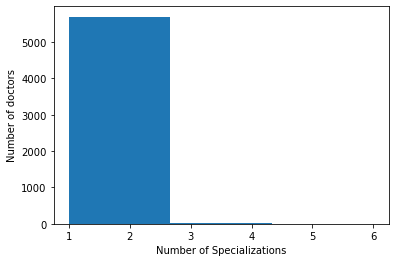

In [24]:
plt.hist(df.numberOfSpecializations, bins=3)
plt.xlabel("Number of Specializations")
plt.ylabel("Number of doctors")

Lets remove doctors with 3 or more Number of Specializations

In [25]:
numberOfSpecializationsOutliers = df[(df["numberOfSpecializations"] >4)].index
numberOfSpecializationsOutliers
df.drop(numberOfSpecializationsOutliers, inplace=True)

**daysToAppointment**

Text(0, 0.5, 'Number of Appointments')

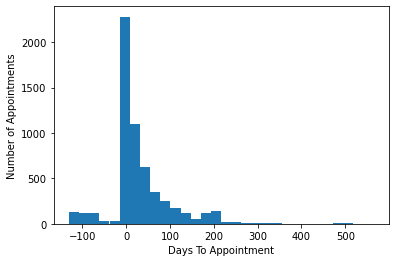

In [26]:
plt.hist(df.daysToAppointment, bins=30)
plt.xlabel("Days To Appointment")
plt.ylabel("Number of Appointments")

We can see that *daysToAppointment* contains negative results due to a bad data.
Also There are big number of of appointments > 200 that we can consider as outliers.
Lets remove them.

In [27]:
daysToAppointmentOutliers = df[(df["daysToAppointment"] < 0) | (df["daysToAppointment"] > 200)].index
df.drop(daysToAppointmentOutliers, inplace=True)

**graduationYear**

Text(0, 0.5, 'Number of Doctors')

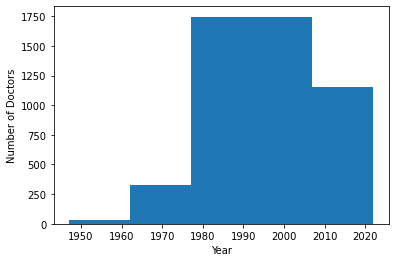

In [28]:
plt.hist(df.graduationYear, bins=5)
plt.xlabel("Year")
plt.ylabel("Number of Doctors")

Lets remove < 1970

In [29]:
graduationYearOutliers = df[(df["graduationYear"] < 1970)].index
df.drop(graduationYearOutliers, inplace=True)

**specializationYear**

Text(0, 0.5, 'Number of Appointments')

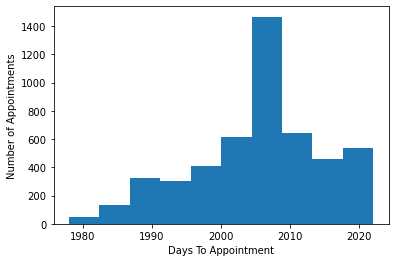

In [30]:
plt.hist(df.specializationYear, bins=10)
plt.xlabel("Days To Appointment")
plt.ylabel("Number of Appointments")

Data OK, no need to make changes.

**numOfLangs**

Text(0, 0.5, 'Number of Appointments')

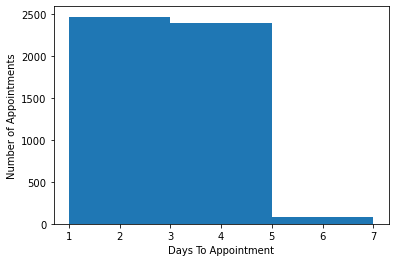

In [31]:
plt.hist(df.numOfLangs, bins=3)
plt.xlabel("Days To Appointment")
plt.ylabel("Number of Appointments")

Lets remove > 5

In [32]:
numOfLangsOutliers = df[(df["numOfLangs"] > 5)].index
df.drop(numOfLangsOutliers, inplace=True)

**totalPerWeek**

Text(0, 0.5, 'Number of Appointments')

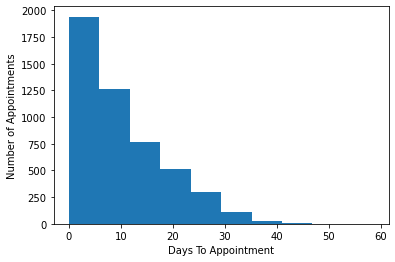

In [33]:
plt.hist(df.totalPerWeek, bins=10)
plt.xlabel("Days To Appointment")
plt.ylabel("Number of Appointments")

Lets remove > 35

In [34]:
totalPerWeekOutliers = df[(df["totalPerWeek"] > 35)].index
df.drop(totalPerWeekOutliers, inplace=True)

Awsome!\
Lets save and continue to the next step.

In [35]:
df.to_csv("data/data_after_cleaning.csv", index=False)
print("Dataframe saved as CSV file.")

Dataframe saved as CSV file.
